# Analyse de Clustering et de Classification sur le Jeu de Données des Maladies Cardiaques

### 1.Préparation des Données :

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('Medicaldataset.csv')
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [36]:
valeurs_nulles = df.isnull().sum()
print(valeurs_nulles)
#Dans un premier temps on cherche à identifier les valeurs null dans le cas où nous aurions besoin de les traiter.
#Cependant ici nous n'en avons pas.

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [37]:
# Étape 2: Supprimer les doublons
df = df.drop_duplicates()

In [38]:
# Étape 3: Gérer les données manquantes
# Pour cet exemple, nous allons simplement supprimer les lignes avec des valeurs manquantes
df = df.dropna()
print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  


In [39]:
# Remplacer les valeurs "negative" par 0 et "positive" par 1 dans la colonne "Result"
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Afficher les première ligne du dataframe pour verification
print(df.head())


   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  
0        160.0   1.80     0.012       0  
1        296.0   6.75     1.060       1  
2        270.0   1.99     0.003       0  
3        270.0  13.87     0.122       1  
4        300.0   1.08     0.003       0  


In [41]:
from sklearn.svm import SVC  # Importation de la classe SVC depuis sklearn biblio

# Creation et entrainement du modele SVM en premier pour commencer
svm_classifier = SVC(kernel='linear', random_state=42)  # Création d'une instance de SVC avec un noyau linéaire
svm_classifier.fit(X_train, y_train)  # Entraînement du model sur l'ensemble de données d'entraînement qu'on a def et on utilise la fonction fit 
#qui ajuste automatiquement les parametre du modele pour avoir la moins de perte possible

# Prédiction sur l'ensemble de test avec .predict sur X_test
y_pred_svm = svm_classifier.predict(X_test)

# Évaluation du modele avec les metriques de performances suivante : 
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calcul de l'accuracy du modele
print("Accuracy (SVM):", accuracy_svm)  # print pour l'afficher
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))  #  rapport de classification du modele
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))  #  la matrice de confusion du modèle svmm
# note  permet de voir la qualité des prédictions en comparant les prédictions du modele avec les vraies donnees des échantillons


Accuracy (SVM): 0.9367088607594937
Classification Report (SVM):
               precision    recall  f1-score   support

       False       0.93      0.97      0.95        93
        True       0.95      0.89      0.92        65

    accuracy                           0.94       158
   macro avg       0.94      0.93      0.93       158
weighted avg       0.94      0.94      0.94       158

Confusion Matrix (SVM):
 [[90  3]
 [ 7 58]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Creation et entrainement du modele  KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Création d'une instance de KNeighborsClassifier avec k=3 TEST 4 pour un meilleur accurary , enlever car on a un moins bien resultat
#knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Prédiction sur l'ensemble de test
y_pred_knn = knn_classifier.predict(X_test)

# Évaluation du modeles
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))


Accuracy (KNN): 0.7848101265822784
Classification Report (KNN):
               precision    recall  f1-score   support

       False       0.77      0.91      0.83        93
        True       0.83      0.60      0.70        65

    accuracy                           0.78       158
   macro avg       0.80      0.76      0.76       158
weighted avg       0.79      0.78      0.78       158

Confusion Matrix (KNN):
 [[85  8]
 [26 39]]


In [43]:
from sklearn.naive_bayes import GaussianNB

# Création et entrainement du modele Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Évaluation du modele
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))


Accuracy (Naive Bayes): 0.9493670886075949
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

       False       0.95      0.97      0.96        93
        True       0.95      0.92      0.94        65

    accuracy                           0.95       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.95      0.95      0.95       158

Confusion Matrix (Naive Bayes):
 [[90  3]
 [ 5 60]]


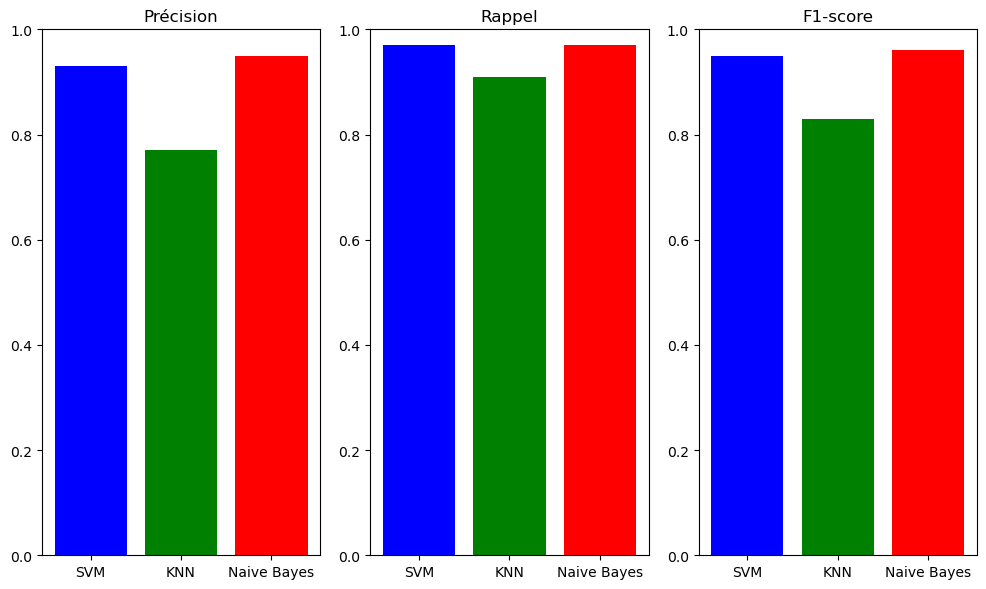

In [44]:
  import matplotlib.pyplot as plt

# Précision, Rappel et F1-score pour chaque modèle pour le False
precision = [0.93, 0.77, 0.95]
recall = [0.97, 0.91, 0.97]
f1_score = [0.95, 0.83, 0.96]

# Noms des modele utilisé
models = ['SVM', 'KNN', 'Naive Bayes']

# Création du diagramme à barres figure
plt.figure(figsize=(10, 6))

# Précision
plt.subplot(1, 3, 1)
plt.bar(models, precision, color=['blue', 'green', 'red'])
plt.title('Précision')
plt.ylim(0, 1)

# Rappel
plt.subplot(1, 3, 2)
plt.bar(models, recall, color=['blue', 'green', 'red'])
plt.title('Rappel')
plt.ylim(0, 1)

# F1-score
plt.subplot(1, 3, 3)
plt.bar(models, f1_score, color=['blue', 'green', 'red'])
plt.title('F1-score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show() #print affichage